In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# read the data
df= pd.read_csv('ai4i2020.csv')

In [3]:
# drop non-integer column
df = df.drop(['Product ID', 'Type'], axis=1)

# Balance the data for machine failure

In [4]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 300 samples from each class
E,train, test = stratified_sample(df, target_column='Machine failure', n_samples=300)

# Show the result of the stratified sampling
print(E)

       UDI  Air temperature [K]  Process temperature [K]  \
4612  4613                303.0                    311.3   
7654  7655                300.3                    311.5   
6532  6533                301.2                    310.6   
665    666                297.5                    308.9   
2760  2761                299.8                    309.2   
...    ...                  ...                      ...   
259    260                298.1                    308.2   
7087  7088                300.6                    310.3   
4361  4362                302.1                    310.1   
4328  4329                301.6                    310.1   
4727  4728                303.4                    311.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
4612                    2194         16.5              148                0   
7654                    1540         41.5              151                0   
6532                    1352         52.0 

In [5]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['Machine failure']
y_test = test['Machine failure']

# Random forest model

In [6]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [7]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.925
Precision: 0.9251180883578771
Recall: 0.925
F1 Score: 0.9249947913049518


In [8]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [9]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    60
1    60
Name: Machine failure, dtype: int64


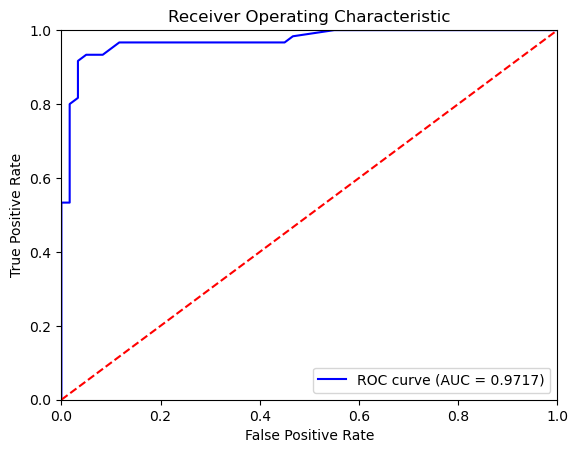

In [10]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree model

In [11]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

#Train the model
dt.fit(X_train, y_train)

# Evaluate the model
y_pred = dt.predict(X_test)

In [12]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8833333333333333
Precision: 0.8837597330367075
Recall: 0.8833333333333333
F1 Score: 0.8833009169213671


In [13]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

In [14]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    60
1    60
Name: Machine failure, dtype: int64


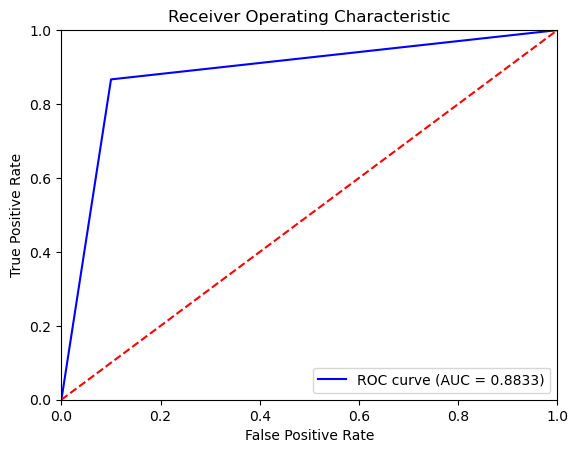

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support vector model

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_pred = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8
Precision: 0.8172737955346651
Recall: 0.8
F1 Score: 0.7972402140242185


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

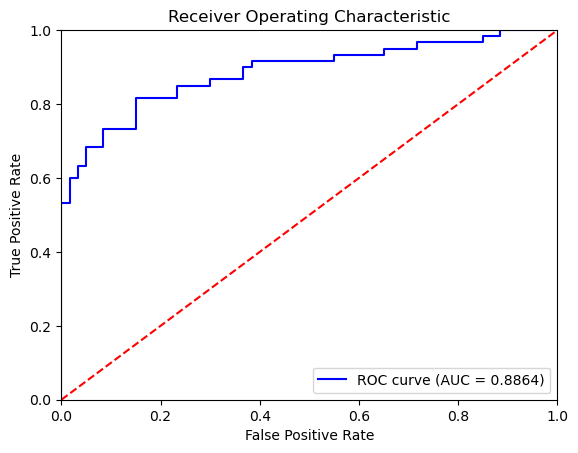

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Balance the data for TWF

In [4]:
(df[['TWF']]==1).sum()

TWF    46
dtype: int64

In [5]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 45 samples from each class
X,train, test = stratified_sample(df, target_column='TWF', n_samples=45)


       UDI  Air temperature [K]  Process temperature [K]  \
7732  7733                300.6                    312.0   
9593  9594                299.1                    310.2   
790    791                296.8                    307.9   
2786  2787                300.2                    309.5   
8441  8442                298.6                    309.9   
...    ...                  ...                      ...   
9758  9759                298.6                    309.8   
6256  6257                301.0                    310.6   
77      78                298.8                    308.9   
1682  1683                297.9                    307.4   
7087  7088                300.6                    310.3   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
7732                    1430         42.7              130                0   
9593                    1352         52.8               41                0   
790                     1420         45.4 

In [6]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['TWF']
y_test = test['TWF']

# Random forest model

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888


In [9]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    9
1    9
Name: TWF, dtype: int64


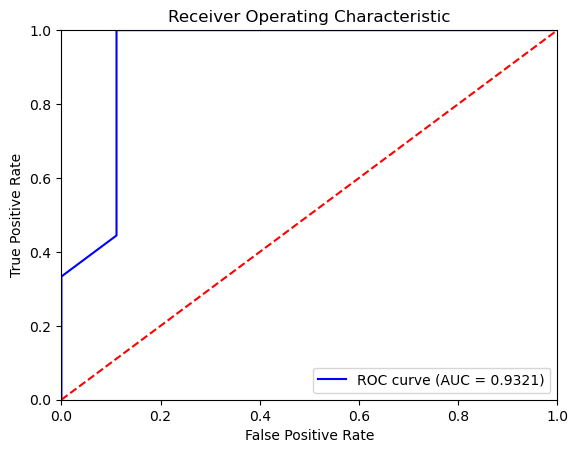

In [11]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree

In [12]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Evaluate the model
y_preddt = dt.predict(X_test)

In [13]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, average='macro')
recall = recall_score(y_test, y_preddt, average='macro')
f1 = f1_score(y_test, y_preddt, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8888888888888888


In [14]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

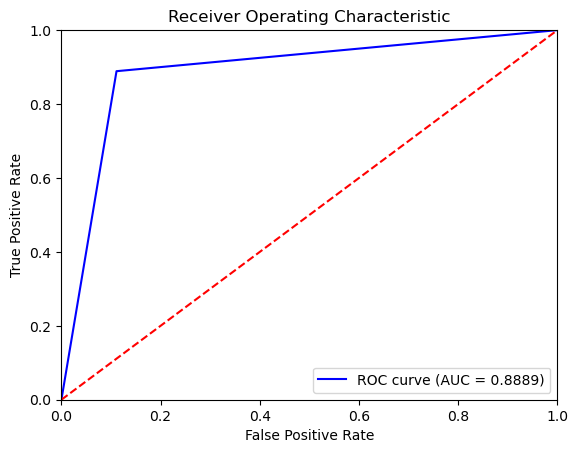

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support Vector model

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_predsv = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_predsv)
precision = precision_score(y_test, y_predsv, average='macro')
recall = recall_score(y_test, y_predsv, average='macro')
f1 = f1_score(y_test, y_predsv, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9444444444444444
Precision: 0.95
Recall: 0.9444444444444444
F1 Score: 0.9442724458204335


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

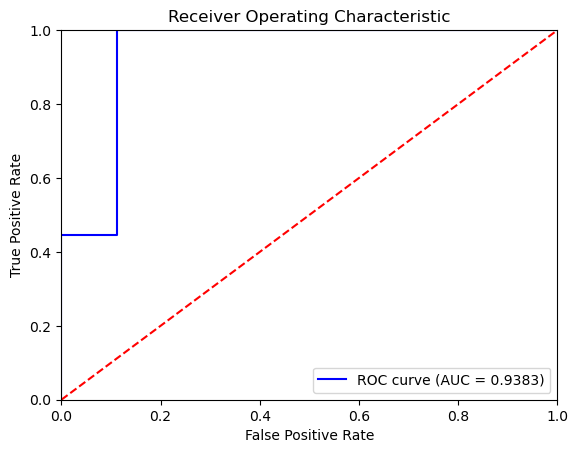

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Balance the data for HDF

In [4]:
(df[['HDF']]==1).sum()

HDF    115
dtype: int64

In [5]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 100 samples from each class
F,train, test = stratified_sample(df, target_column='HDF', n_samples=100)


       UDI  Air temperature [K]  Process temperature [K]  \
8539  8540                298.5                    309.4   
5260  5261                303.5                    313.0   
4677  4678                303.5                    311.6   
2249  2250                299.2                    308.5   
2673  2674                299.8                    309.4   
...    ...                  ...                      ...   
4596  4597                303.0                    311.2   
4130  4131                301.9                    310.4   
4258  4259                302.7                    311.1   
4307  4308                301.4                    309.9   
4342  4343                301.7                    309.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
8539                    1517         40.2               45                0   
5260                    1492         46.1               89                0   
4677                    1466         47.0 

In [6]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['HDF']
y_test = test['HDF']

# Random forest

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [9]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    20
1    20
Name: HDF, dtype: int64


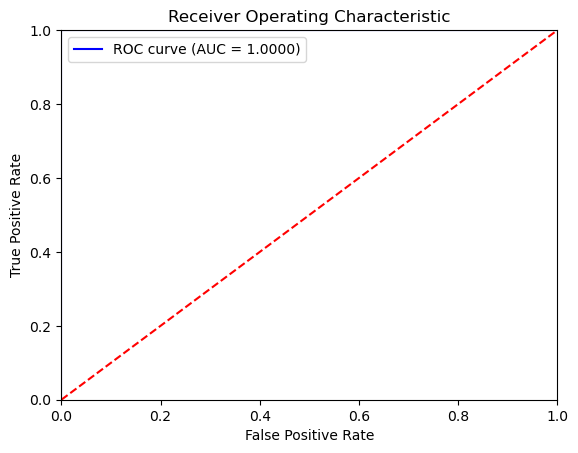

In [11]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree model

In [12]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Evaluate the model
y_preddt = dt.predict(X_test)

In [13]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, average='macro')
recall = recall_score(y_test, y_preddt, average='macro')
f1 = f1_score(y_test, y_preddt, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.975
Precision: 0.9761904761904762
Recall: 0.975
F1 Score: 0.9749843652282677


In [14]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

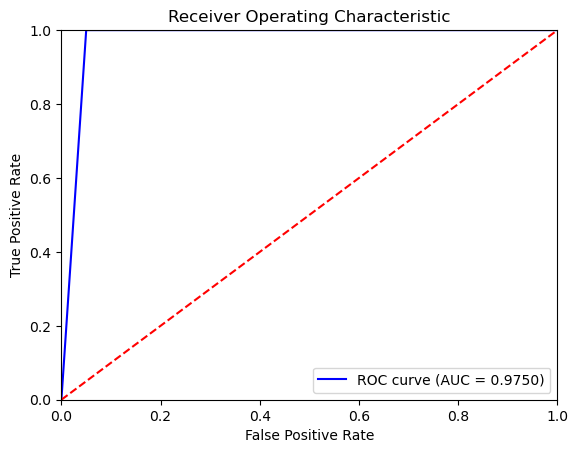

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support vector

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_predsv = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_predsv)
precision = precision_score(y_test, y_predsv, average='macro')
recall = recall_score(y_test, y_predsv, average='macro')
f1 = f1_score(y_test, y_predsv, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

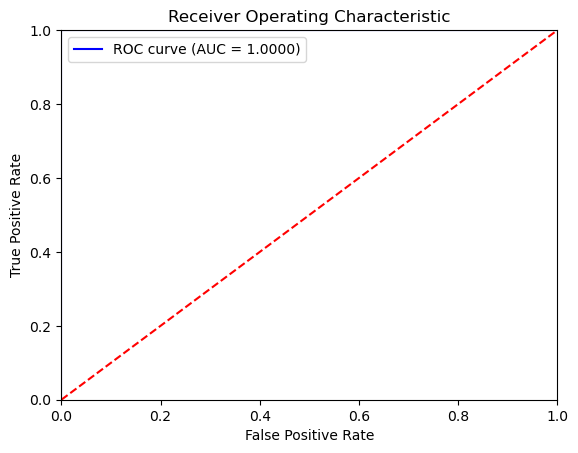

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Balance the data for PWF

In [4]:
(df[['PWF']]==1).sum()

PWF    95
dtype: int64

In [5]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 90 samples from each class
P,train, test = stratified_sample(df, target_column='PWF', n_samples=90)


       UDI  Air temperature [K]  Process temperature [K]  \
1279  1280                298.3                    309.6   
9165  9166                297.6                    308.6   
8436  8437                298.7                    309.9   
7744  7745                300.4                    311.7   
8580  8581                297.5                    308.1   
...    ...                  ...                      ...   
5706  5707                302.4                    311.9   
5615  5616                303.0                    312.2   
2444  2445                299.2                    308.6   
6024  6025                300.7                    310.9   
2879  2880                300.6                    309.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1279                    1531         40.1               81                0   
9165                    1326         62.4              173                0   
8436                    1371         51.3 

In [6]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['PWF']
y_test = test['PWF']

# Random forest

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9166666666666666
Precision: 0.9285714285714286
Recall: 0.9166666666666667
F1 Score: 0.916083916083916


In [9]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    18
1    18
Name: PWF, dtype: int64


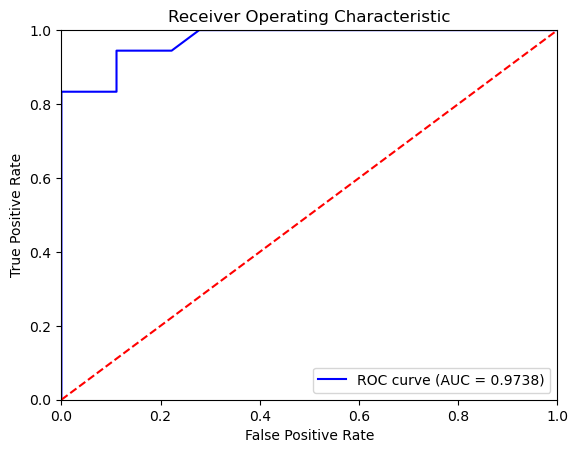

In [11]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree

In [12]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Evaluate the model
y_preddt = dt.predict(X_test)

In [13]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, average='macro')
recall = recall_score(y_test, y_preddt, average='macro')
f1 = f1_score(y_test, y_preddt, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9166666666666666
Precision: 0.9285714285714286
Recall: 0.9166666666666667
F1 Score: 0.916083916083916


In [14]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

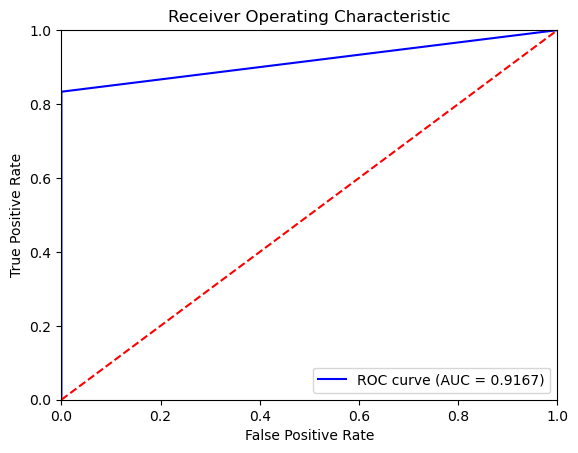

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support vector

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_predsv = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_predsv)
precision = precision_score(y_test, y_predsv, average='macro')
recall = recall_score(y_test, y_predsv, average='macro')
f1 = f1_score(y_test, y_predsv, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

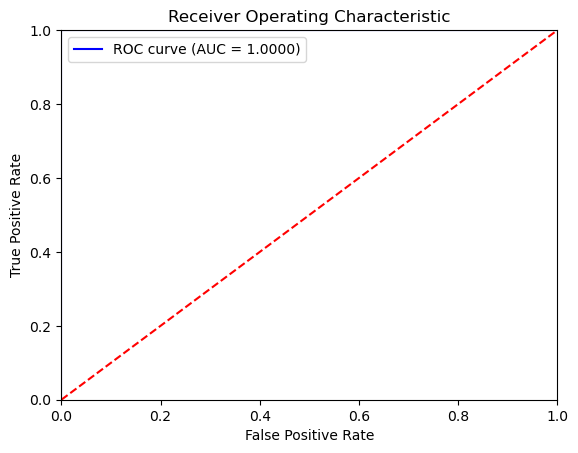

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Balance the data for OSF

In [4]:
(df[['OSF']]==1).sum()

OSF    98
dtype: int64

In [5]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 95 samples from each class
O,train, test = stratified_sample(df, target_column='OSF', n_samples=95)


       UDI  Air temperature [K]  Process temperature [K]  \
1498  1499                298.0                    308.8   
5331  5332                303.7                    312.8   
7252  7253                300.2                    310.4   
4862  4863                303.5                    312.1   
8468  8469                298.6                    309.7   
...    ...                  ...                      ...   
5219  5220                303.8                    313.0   
2502  2503                299.2                    309.0   
4117  4118                301.9                    310.5   
8195  8196                299.4                    310.8   
9659  9660                298.9                    309.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1498                    1790         27.2              193                0   
5331                    1448         44.5               55                0   
7252                    1501         42.9 

In [6]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['OSF']
y_test = test['OSF']

# Random forest

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.975
Recall: 0.9736842105263157
F1 Score: 0.9736659736659736


In [9]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    19
1    19
Name: OSF, dtype: int64


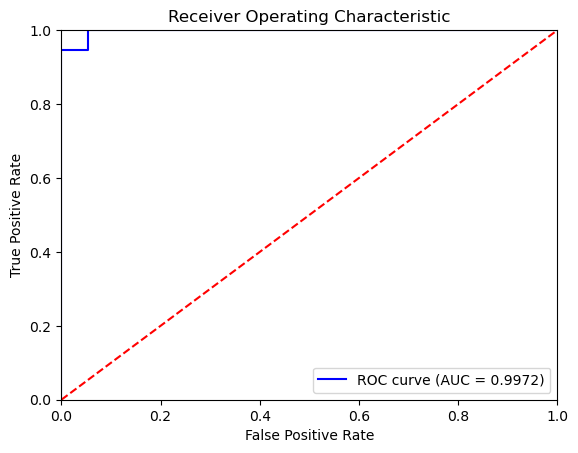

In [11]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree

In [12]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Evaluate the model
y_preddt = dt.predict(X_test)

In [13]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, average='macro')
recall = recall_score(y_test, y_preddt, average='macro')
f1 = f1_score(y_test, y_preddt, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.975
Recall: 0.9736842105263157
F1 Score: 0.9736659736659736


In [14]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

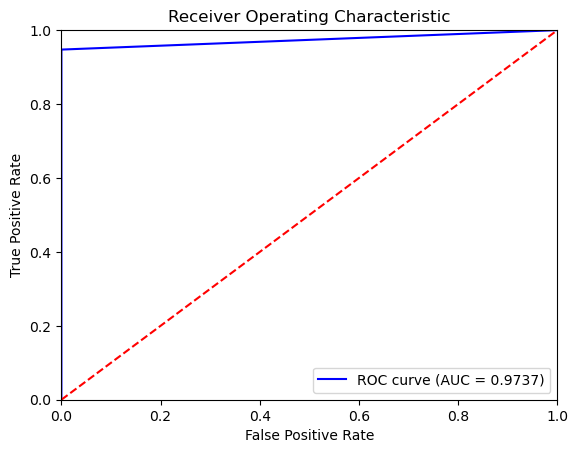

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support vector

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_predsv = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_predsv)
precision = precision_score(y_test, y_predsv, average='macro')
recall = recall_score(y_test, y_predsv, average='macro')
f1 = f1_score(y_test, y_predsv, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

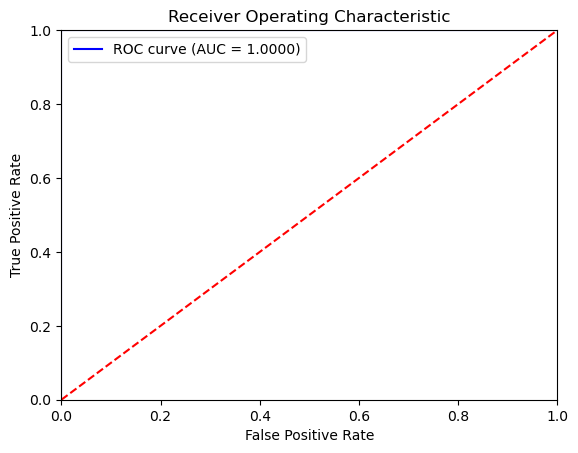

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Balance the data for RNF

In [4]:
(df[['RNF']]==1).sum()

RNF    19
dtype: int64

In [5]:
def stratified_sample(df, target_column, n_samples):
    # Split by class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Sample n_samples from each class (adjust as needed for balance)
    class_0_sample = class_0.sample(n_samples, random_state=42)
    class_1_sample = class_1.sample(n_samples, random_state=42)
    
    # Combine the samples
    stratified_sample = pd.concat([class_0_sample, class_1_sample])
    
    l1=int(0.8*len(class_0_sample))
    l2=int(0.8*len(class_1_sample))
    
    train = pd.concat([class_0_sample.sample(l1),class_1_sample.sample(l2)])
    
    print(train)
    test = stratified_sample.drop(train.index)
    
    
    return stratified_sample, train, test

# Stratified sampling to get 19 samples from each class
R,train, test = stratified_sample(df, target_column='RNF', n_samples=19)


       UDI  Air temperature [K]  Process temperature [K]  \
8729  8730                297.3                    308.7   
39      40                298.8                    309.1   
7063  7064                300.7                    310.4   
9700  9701                298.9                    309.8   
6895  6896                301.0                    311.6   
8158  8159                299.6                    310.8   
6969  6970                300.8                    311.1   
2172  2173                299.5                    309.2   
8437  8438                298.7                    309.8   
8882  8883                298.0                    309.2   
7553  7554                300.3                    311.3   
1056  1057                296.8                    307.8   
7220  7221                299.8                    309.7   
1262  1263                297.8                    309.2   
3257  3258                301.2                    309.9   
1302  1303                298.6         

In [6]:
# Split the data
X_train = train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
X_test = test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train =train['RNF']
y_test = test['RNF']

# Random forest

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [8]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.875
Precision: 0.9
Recall: 0.875
F1 Score: 0.873015873015873


In [9]:
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
print("Class distribution in y_test:", y_test.value_counts())

Class distribution in y_test: 0    4
1    4
Name: RNF, dtype: int64


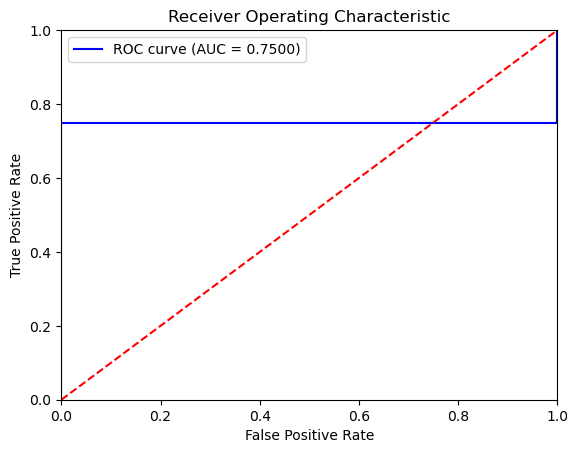

In [11]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Decision tree

In [12]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Evaluate the model
y_preddt = dt.predict(X_test)

In [13]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_preddt)
precision = precision_score(y_test, y_preddt, average='macro')
recall = recall_score(y_test, y_preddt, average='macro')
f1 = f1_score(y_test, y_preddt, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1 Score: 0.4666666666666667


In [14]:
y_pred_dt = dt.predict_proba(X_test)[:, 1]

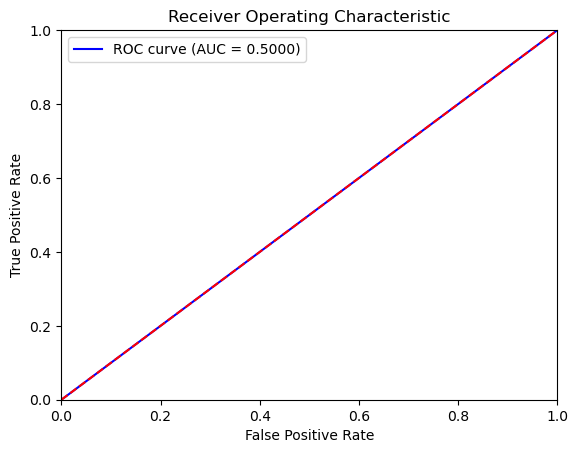

In [15]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Support vector

In [16]:
#  Initialize the Support Vector Classifier (SVC)
sv= SVC(kernel='linear', probability=True)  # You can change the kernel ('linear', 'rbf', 'poly', 'sigmoid')

#  Train the model on the training data
sv.fit(X_train, y_train)

#  Make predictions on the test data
y_predsv = sv.predict(X_test)

In [17]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_predsv)
precision = precision_score(y_test, y_predsv, average='macro')
recall = recall_score(y_test, y_predsv, average='macro')
f1 = f1_score(y_test, y_predsv, average='macro')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.625
Precision: 0.6333333333333333
Recall: 0.625
F1 Score: 0.6190476190476191


In [18]:
y_pred_sv = sv.predict_proba(X_test)[:, 1]

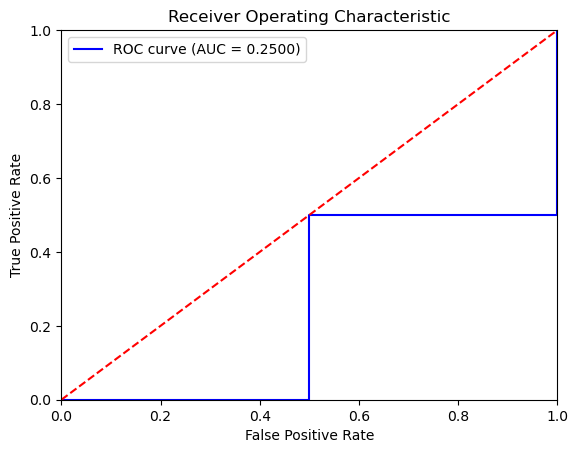

In [19]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_sv)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Model comparison

In [16]:
# Create a DataFrame to display the results
results_df = pd.DataFrame({'Output':['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Average'],
                           'Random forest':[0.9717, 0.9321, 1.0, 0.9738, 0.9972, 0.75, 0.937467],
                           'Decision tree':[0.8833, 0.8889, 0.975, 0.9167, 0.9737, 0.5, 0.856267],
                           'Support vector':[0.8864, 0.9383, 1.0, 1.0, 1.0, 0.25,0.845783],
                           'Average':[0.9138, 0.9198, 0.9917, 0.9635, 0.9903, 0.5, 0.879839]})

# Display the results
print(results_df)

            Output  Random forest  Decision tree  Support vector   Average
0  Machine failure       0.971700       0.883300        0.886400  0.913800
1              TWF       0.932100       0.888900        0.938300  0.919800
2              HDF       1.000000       0.975000        1.000000  0.991700
3              PWF       0.973800       0.916700        1.000000  0.963500
4              OSF       0.997200       0.973700        1.000000  0.990300
5              RNF       0.750000       0.500000        0.250000  0.500000
6          Average       0.937467       0.856267        0.845783  0.879839


In [13]:
p= 0.937467    +   0.856267   +     0.845783
p/3

0.879839